In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Fixing the seed of the random number generator
np.random.seed(2021)

In [3]:
# Loading the phishing dataset with the help of Pandas
phishing_data = pd.read_csv("Phishing.csv")

In [4]:
# Examining the first 10 rows of the dataset
phishing_data.head(15)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [5]:
## Performing transform to improve the readability
phishing_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,0,1,0,0,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,1,-1,0,-1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1
Favicon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
# Finding the exact diamentions of the dataset
phishing_data.shape

(11055, 31)

In [7]:
# Determining number of unique labels present in a dataset
unique_labels = phishing_data['Result'].unique()

In [8]:
print(len(unique_labels))

2


In [9]:
data = {'Class': phishing_data['Result'].unique()[::-1], 
        'Num_Observations': [sum(phishing_data['Result'] == 1),sum(phishing_data['Result'] == -1)]}

In [10]:
website_distribution = pd.DataFrame(data)

In [11]:
website_distribution

,Class,Num_Observations
0,1,6157
1,-1,4898


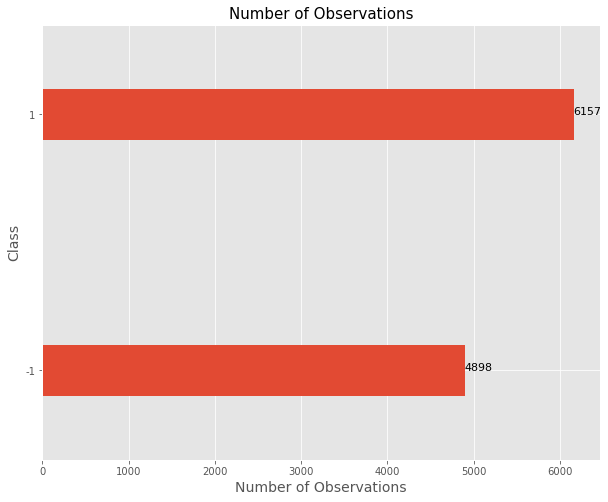

In [12]:
# Using Matplotlib plot function to draw a horizontal bar chart to represent the count of different classes
plt.style.use('ggplot')

subplot = website_distribution.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Number of Observations', fontsize= 15)
subplot.set_xlabel('Number of Observations', fontsize= 14)
subplot.set_ylabel('Class', fontsize= 14)

for i in subplot.patches:
    subplot.text(i.get_width() + 0.1, i.get_y() + 0.1, str(i.get_width()), fontsize= 11)


In [13]:
# Summary Statistics of Phishing dataset
phishing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [14]:
#  Data type of the 'Phishing' dataset columns
phishing_data.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [15]:
# Column information of the 'Phishing' dataset 
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [16]:
phishing_data['Result'].where(~(phishing_data.Result == -1), other=0, inplace=True)
phishing_data.rename(columns={'Result': 'Class'}, inplace=True)
phishing_data['Class'].unique()

array([0, 1], dtype=int64)

In [17]:
phishing_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


In [18]:
pd.set_option('display.max_columns', None)
phishing_data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

In [19]:
X = phishing_data.iloc[:, 0:30].values.astype(int)
y = phishing_data.iloc[:, -1].values.astype(int)

In [20]:
print(X.shape)
print(y.shape)

(11055, 30)
(11055,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= np.random.seed(9))

In [22]:
# Searialize the numpy arrays
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

In [23]:
X_train, y_train = np.load("X_train.npy", allow_pickle= True), np.load("y_train.npy", allow_pickle= True)
X_test, y_test = np.load("X_test.npy", allow_pickle= True), np.load("y_test.npy", allow_pickle= True)

In [24]:
model = LogisticRegression(solver = 'liblinear', C = 10.0, random_state = 0)

In [25]:
model.fit(X_train, y_train) # Training the model with Training data which was splitted earlier

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [26]:
y_pred = model.predict(X_test)

In [27]:
print("Accuracy score of the Logistic Regression classifer with default hyperparameter values {0:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

Accuracy score of the Logistic Regression classifer with default hyperparameter values 92.36 %


In [31]:
print("Classification Report of the logistic regression classifire with default hyperparameter values")
print("\n")
print(classification_report(y_test, y_pred, target_names=["Phishing Websites", "Normal Websites"]))

Classification Report of the logistic regression classifire with default hyperparameter values


                   precision    recall  f1-score   support

Phishing Websites       0.91      0.92      0.92       990
  Normal Websites       0.93      0.93      0.93      1221

         accuracy                           0.92      2211
        macro avg       0.92      0.92      0.92      2211
     weighted avg       0.92      0.92      0.92      2211



#### Hyperparameter Tuning For Tuning the Model

In [32]:
penalty = ["l1", "l2"]
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200, 250]

param_grid  = dict(penalty=penalty, C=C, max_iter=max_iter)

In [39]:
random_model = RandomizedSearchCV(estimator =model, param_distributions = param_grid, cv = 5)

In [41]:
random_model_result = random_model.fit(X_train, y_train)

best_score, best_params = random_model_result.best_score_ , random_model_result.best_params_

print("Best Score: %.2f using %s" % (best_score * 100, best_params))

Best Score: 92.61 using {'penalty': 'l2', 'max_iter': 200, 'C': 0.8}
